In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import json
from rdkit.ML.Cluster import Butina
from scipy.cluster import hierarchy

RDKit WARNING: [01:37:03] Enabling RDKit 2019.09.1 jupyter extensions


In [2]:
import warnings
warnings.filterwarnings('ignore')

# Стабильность сигнатур, возмущенных одним соединением и одинаковым временем действия

In [3]:
df_CD_signature_metadata = pd.read_csv('../DATA/CD_signature_metadata.csv', index_col = 0)
df_CD_signature_metadata.head()

,SCS_centered_by_batch,batch,cell_id,mean_cosine_dist_centered_by_batch,pert_desc,pert_dose,pert_id,pert_time
sig_id,,,,,,,,
AML001_CD34_6H:BRD-K43389675:10,0.0,AML001_CD34_6H,CD34,0.853471,DAUNORUBICIN,10.00000,BRD-K43389675,6.0
AML001_PC3_6H:BRD-A19037878:0.37037,0.0,AML001_PC3_6H,PC3,0.505995,TRICHOSTATIN_A,0.37037,BRD-A19037878,6.0
AML001_PC3_6H:BRD-A19037878:1.11111,0.0,AML001_PC3_6H,PC3,0.676204,TRICHOSTATIN_A,1.11111,BRD-A19037878,6.0
AML001_PC3_6H:BRD-A19037878:10,0.0,AML001_PC3_6H,PC3,0.747633,TRICHOSTATIN_A,10.00000,BRD-A19037878,6.0
AML001_PC3_6H:BRD-A19037878:3.33333,0.0,AML001_PC3_6H,PC3,0.659851,TRICHOSTATIN_A,3.33333,BRD-A19037878,6.0


In [4]:
stab_sign = pd.read_table('../DATA/sig_stability_mol_time.csv', sep=',', index_col=0)

In [6]:
stab_sign.head()

,pert_id,pert_time,cell_id_1,cell_id_2,pert_name,sig_id_1,sig_id_2,canonical_smiles,List of up intersecting genes,Tc Up,List of down intersecting genes,Tc Down
0,BRD-K81418486,24.0,MCF7,PC3,vorinostat,MUC.CP005_MCF7_24H:BRD-K81418486-001-13-7:0.3704,PCLB002_PC3_24H:BRD-K81418486:0.12,ONC(=O)CCCCCCC(=O)Nc1ccccc1,"['PPAP2B', 'SUMO3', 'DFNA5', 'LRRC41', 'PLK1S1...",0.405316,"['CHI3L1', 'RGS5', 'CXCL13', 'CPB1', 'COL3A1',...",0.032895
1,BRD-K81418486,24.0,VCAP,MCF7,vorinostat,DOS007_VCAP_24H:BRD-K81418486:10,MUC.CP004_MCF7_24H:BRD-K81418486-001-22-8:10,ONC(=O)CCCCCCC(=O)Nc1ccccc1,"['TMEM41B', 'MAN2B1', 'IDI1', 'RAD9A', 'HSPA8'...",0.320574,"['FXYD3', 'CPE', 'ANP32B', 'S100A12', 'MYC', '...",0.244444
2,BRD-A19500257,24.0,PC3,MCF7,geldanamycin,ASG001_PC3_24H:BRD-A19500257-001-04-7:0.4,DOSBIO001_MCF7_24H:BRD-A19500257:3.33333,COC1CC(C)CC2=C(OC)C(=O)C=C(NC(=O)C(C)=CC=CC(OC...,"['FXYD6', 'MAN2B1', 'NRCAM', 'RAD9A', 'NQO2', ...",0.307065,"['NETO2', 'FXYD3', 'PLK1', 'MME', 'LRRC41', 'T...",0.309392
3,BRD-K81418486,6.0,PC3,A375,vorinostat,CPC007_PC3_6H:BRD-K81418486-001-21-0:10,CPC018_A375_6H:BRD-K81418486:10,ONC(=O)CCCCCCC(=O)Nc1ccccc1,"['FXYD3', 'CKB', 'SSFA2', 'P4HA2', 'P4HA1', 'F...",0.302158,"['HSPA6', 'RAD9A', 'DAB2', 'FBLN1', 'MARCKS', ...",0.241379
4,BRD-K54233340,6.0,A375,HEPG2,dorsomorphin,CPC004_A375_6H:BRD-K54233340-300-01-0:10,CPC006_HEPG2_6H:BRD-K54233340-300-01-0:10,C(CN1CCCCC1)Oc2ccc(cc2)c3cnc4c(cnn4c3)c5ccncc5,"['PTGS2', 'PLK1', 'TPBG', 'POLR3E', 'ANP32A', ...",0.285714,"['ZNF238', 'FN1', 'VIM', 'HSD17B12', 'CYB5R1',...",0.028226


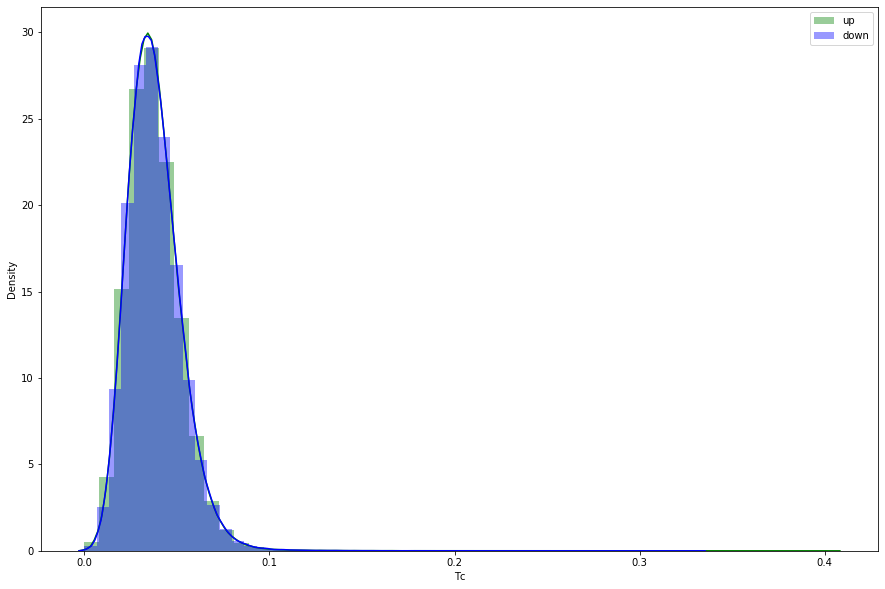

In [8]:
plt.figure(figsize=(15, 10))
snsplot = sns.distplot(stab_sign['Tc Up'], color = 'green', label = 'up')
snsplot = sns.distplot(stab_sign['Tc Down'], color = 'b', label = 'down')
snsplot.legend()
snsplot.set_xlabel('Tc')
plt.show()
fig = snsplot.get_figure()

# Кластеризация сигнатур (клеточных линий) в группах сигнатур, возмущенных одним соединением  одно время


Какие значения времени встречаются.

In [9]:
stab_sign['pert_time'].value_counts()

24.0    472740
6.0     311107
48.0        47
Name: pert_time, dtype: int64

Какие соединения встречаются и как много сигнатур ими вызвано

In [10]:
stab_sign['pert_id'].value_counts()

BRD-K81418486    190778
BRD-A19500257    144213
BRD-A19037878    120585
BRD-A75409952    100488
BRD-K27305650      8475
                  ...  
BRD-A03926027         1
BRD-K41924482         1
BRD-A79672927         1
BRD-A65516924         1
BRD-K46558254         1
Name: pert_id, Length: 3944, dtype: int64

In [11]:
def select_tanimoto_score_pert_id_pert_time(pert_id, time, df_stab_sign):
    df_pert_id = df_stab_sign[df_stab_sign['pert_id'] == pert_id]
    df_pert_id_pert_time = df_pert_id[df_pert_id['pert_time'] == time]
    list_sign_id = []
    for i in list(df_pert_id_pert_time.index):
        list_sign_id.append(df_pert_id_pert_time.loc[i, 'sig_id_1'])
        list_sign_id.append(df_pert_id_pert_time.loc[i, 'sig_id_2'])
    list_sign_id = list(set(list_sign_id))
    n = len(list_sign_id)
    matrix_tanimoto = np.ones((n,n))
    df_tanimoto = pd.DataFrame(matrix_tanimoto)
    df_tanimoto.index = list_sign_id
    df_tanimoto.columns = list_sign_id
    for i in list(df_pert_id_pert_time.index):
        if list_sign_id.index(df_pert_id_pert_time.loc[i, 'sig_id_1']) < list_sign_id.index(df_pert_id_pert_time.loc[i, 'sig_id_2']):
            df_tanimoto.loc[df_pert_id_pert_time.loc[i, 'sig_id_1'], df_pert_id_pert_time.loc[i, 'sig_id_2']] = \
                (df_pert_id_pert_time.loc[i, 'Tc Up'] + df_pert_id_pert_time.loc[i, 'Tc Down'])/2
        else:
            df_tanimoto.loc[df_pert_id_pert_time.loc[i, 'sig_id_2'], df_pert_id_pert_time.loc[i, 'sig_id_1']] = \
                (df_pert_id_pert_time.loc[i, 'Tc Up'] + df_pert_id_pert_time.loc[i, 'Tc Down'])/2
    return df_tanimoto

In [12]:
def create_dist_list(df_coeff_tanimoto):
    dists = []
    nfps = df_coeff_tanimoto.shape[0]
    for i in range(1, nfps):
        for j in range(i):
            dists.append(1 - df_coeff_tanimoto.iloc[j, i])
    return dists

In [13]:
def butina_cluster_tanimoto_score(df_coeff_tanimoto_coeff, cutoff):
    dists = []
    nfps = df_coeff_tanimoto_coeff.shape[0]
    for i in range(1, nfps):
        for j in range(i):
            dists.append(1 - df_coeff_tanimoto_coeff.iloc[j, i])
    mol_clusters = Butina.ClusterData(dists, nfps, cutoff, isDistData=True)
    cluster_id_list = [0] * nfps
    for idx, cluster in enumerate(mol_clusters, 1):
        for member in cluster:
            cluster_id_list[member] = idx
    return cluster_id_list

In [14]:
def claster_sign_or_cell_line(pert_id, time, df_stab_sign, df_CD_signature_metadata, cutoff=0.4):
    df_tanimoto = select_tanimoto_score_pert_id_pert_time(pert_id, time, df_stab_sign)
    df_sign_id_cell_id = pd.DataFrame(list(df_tanimoto.index))
    df_sign_id_cell_id['pert_id'] = pert_id
    df_sign_id_cell_id['pert_time'] = time
    df_sign_id_cell_id['cell_id'] = None
    df_sign_id_cell_id['cluster'] = None

    df_sign_id_cell_id.columns = ['sign_id', 'pert_id', 'pert_time', 'cell_id', 'cluster']

    for i in list(df_sign_id_cell_id.index):
        df_sign_id_cell_id.loc[i, 'cell_id'] = df_CD_signature_metadata.loc[df_sign_id_cell_id.loc[i, 'sign_id'],
                                                                            'cell_id']
    df_sign_id_cell_id['cluster'] = butina_cluster_tanimoto_score(df_tanimoto, cutoff)
    create_dendrogram(df_tanimoto, figsize = (15, 10))
    return df_sign_id_cell_id

In [15]:
def create_dendrogram(df_tanimoto, figsize = (15, 10)):
    dist_list = create_dist_list(df_tanimoto)
    Z = hierarchy.linkage(dist_list, 'single')
    plt.figure(figsize=figsize)
    dn = hierarchy.dendrogram(Z, labels = list(df_tanimoto.index))

In [16]:
def view_clustering_results(pert_id, time, stab_sign_M, df_CD_signature_metadata, cutoff=0.8):
    print('Анализируем группу с pertubagen : {}, time: {}'.format(pert_id, time))
    df_pert_id_time = claster_sign_or_cell_line(pert_id, time, stab_sign_M, 
                                                    df_CD_signature_metadata, cutoff = cutoff)
    print('количество кластеров : {}\nколичесво сигнатур в группе :{}'.format(df_pert_id_time['cluster'].max(),
                                                                             df_pert_id_time.shape[0]))
    print(df_pert_id_time['cluster'].value_counts()[df_pert_id_time['cluster'].value_counts() > 1])
    return df_pert_id_time

Пока посмотрим на соединения с наибольшим количеством сигнатур (больше 5000)

In [18]:
list_pert_id_with_more_5000sign = stab_sign['pert_id'].value_counts()[
    stab_sign['pert_id'].value_counts() > 5000].index

In [19]:
print(list_pert_id_with_more_5000sign)

Index(['BRD-K81418486', 'BRD-A19500257', 'BRD-A19037878', 'BRD-A75409952',
       'BRD-K27305650', 'BRD-A79768653', 'BRD-K88378636'],
      dtype='object')


Первое вещество

In [20]:
pert_id_0 = list_pert_id_with_more_5000sign[0]
df_pert_id_0 = stab_sign[stab_sign['pert_id'] == pert_id_0]
list_pert_time = list(df_pert_id_0['pert_time'].value_counts()[df_pert_id_0['pert_time'].value_counts() > 2].index)
time_0 = list_pert_time[0]
time_1 = list_pert_time[1]

In [21]:
print(list_pert_time)

[24.0, 6.0]


Первая группа по времени

Анализируем группу с pertubagen : BRD-K81418486, time: 24.0
количество кластеров : 491
количесво сигнатур в группе :494
1    2
2    2
3    2
Name: cluster, dtype: int64


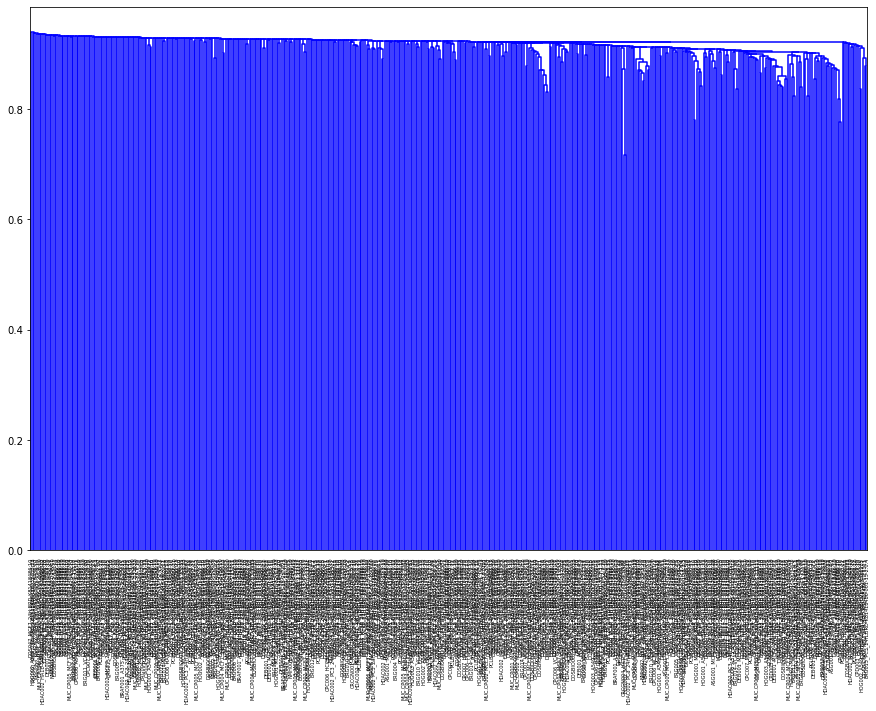

In [22]:
df_pert_id_0_time_0 = view_clustering_results(pert_id_0, time_0, stab_sign, df_CD_signature_metadata, cutoff=0.8)

In [23]:
df_pert_id_0_time_0.head()

,sign_id,pert_id,pert_time,cell_id,cluster
0,ERG014_VCAP_24H:BRD-K81418486-001-15-2:2,BRD-K81418486,24.0,VCAP,491
1,CPC003_PC3_24H:BRD-K81418486:10,BRD-K81418486,24.0,PC3,490
2,CPC012_MCF7_24H:BRD-K81418486:10,BRD-K81418486,24.0,MCF7,489
3,DOS041_A549_24H:BRD-K81418486:0.5,BRD-K81418486,24.0,A549,488
4,CPC012_NPC_24H:BRD-K81418486:10,BRD-K81418486,24.0,NPC,487


Вторая группа

Анализируем группу с pertubagen : BRD-K81418486, time: 6.0
количество кластеров : 371
количесво сигнатур в группе :372
1    2
Name: cluster, dtype: int64


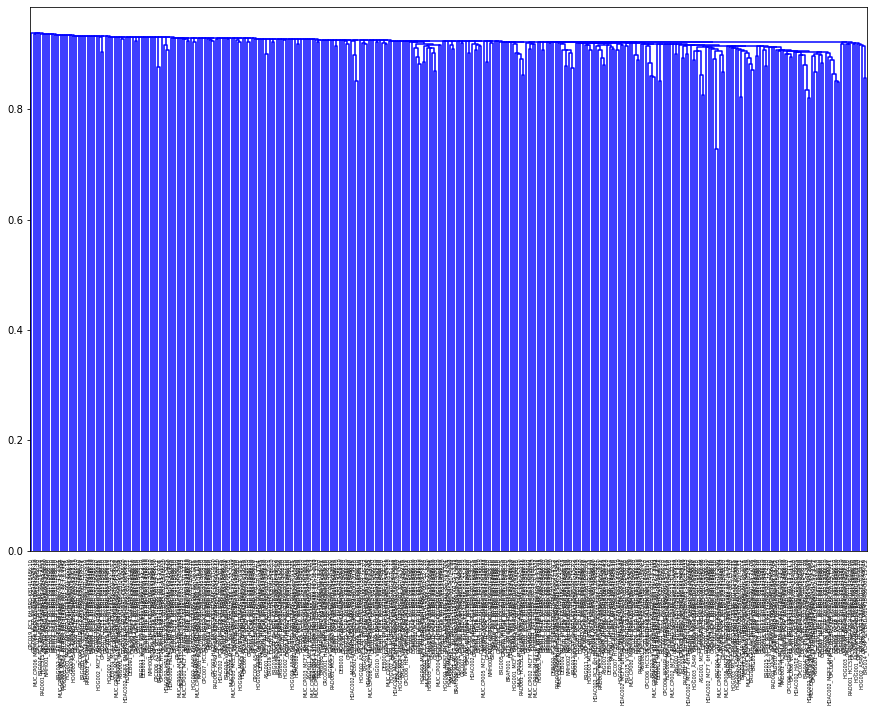

In [24]:
df_pert_id_0_time_1 = view_clustering_results(pert_id_0, time_1, stab_sign, df_CD_signature_metadata, cutoff=0.8)

In [25]:
df_pert_id_0_time_1.head()

,sign_id,pert_id,pert_time,cell_id,cluster
0,HOG001_A549_6H:BRD-K81418486-001-32-7:0.3704,BRD-K81418486,6.0,A549,371
1,CPC016_HEPG2_6H:BRD-K81418486:10,BRD-K81418486,6.0,HEPG2,370
2,HOG002_A549_6H:BRD-K81418486-001-32-7:0.1235,BRD-K81418486,6.0,A549,369
3,NMH002_NPC_6H:BRD-K81418486-001-29-3:10,BRD-K81418486,6.0,NPC,368
4,CPC006_NCIH1694_6H:BRD-K81418486:10,BRD-K81418486,6.0,NCIH1694,367


Второе вещество

In [26]:
pert_id_1 = list_pert_id_with_more_5000sign[1]
df_pert_id_1 = stab_sign[stab_sign['pert_id'] == pert_id_1]
list_pert_time = list(df_pert_id_1['pert_time'].value_counts()[df_pert_id_1['pert_time'].value_counts() > 2].index)
time_0 = list_pert_time[0]
time_1 = list_pert_time[1]
time_2 = list_pert_time[2]

In [27]:
print(list_pert_time)

[24.0, 6.0, 48.0]


Первая группа по времени

Анализируем группу с pertubagen : BRD-A19500257, time: 24.0
количество кластеров : 454
количесво сигнатур в группе :456
1    2
2    2
Name: cluster, dtype: int64


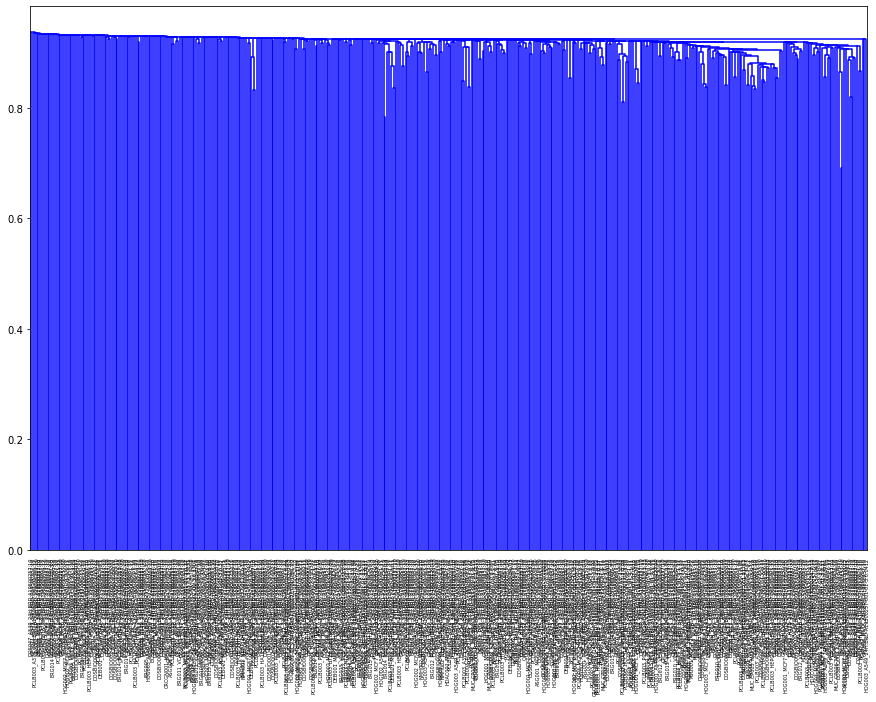

In [28]:
df_pert_id_1_time_0 = view_clustering_results(pert_id_1, time_0, stab_sign, df_CD_signature_metadata, cutoff=0.8)

In [152]:
df_pert_id_1_time_0.head()

,sign_id,pert_id,pert_time,cell_id,cluster
0,DOSBIO002_A375_24H:BRD-A19500257:3.33333,BRD-A19500257,24.0,A375,454
1,PCLB003_HEPG2_24H:BRD-A19500257-001-01-3:0.04,BRD-A19500257,24.0,HEPG2,453
2,ASG001_PC3_24H:BRD-A19500257-001-04-7:0.4,BRD-A19500257,24.0,PC3,2
3,DOS047_PC3_24H:BRD-A19500257:10,BRD-A19500257,24.0,PC3,452
4,PCLB002_HEPG2_24H:BRD-A19500257:0.37,BRD-A19500257,24.0,HEPG2,451


Вторая группа по времени

Анализируем группу с pertubagen : BRD-A19500257, time: 6.0
количество кластеров : 283
количесво сигнатур в группе :285
1    2
2    2
Name: cluster, dtype: int64


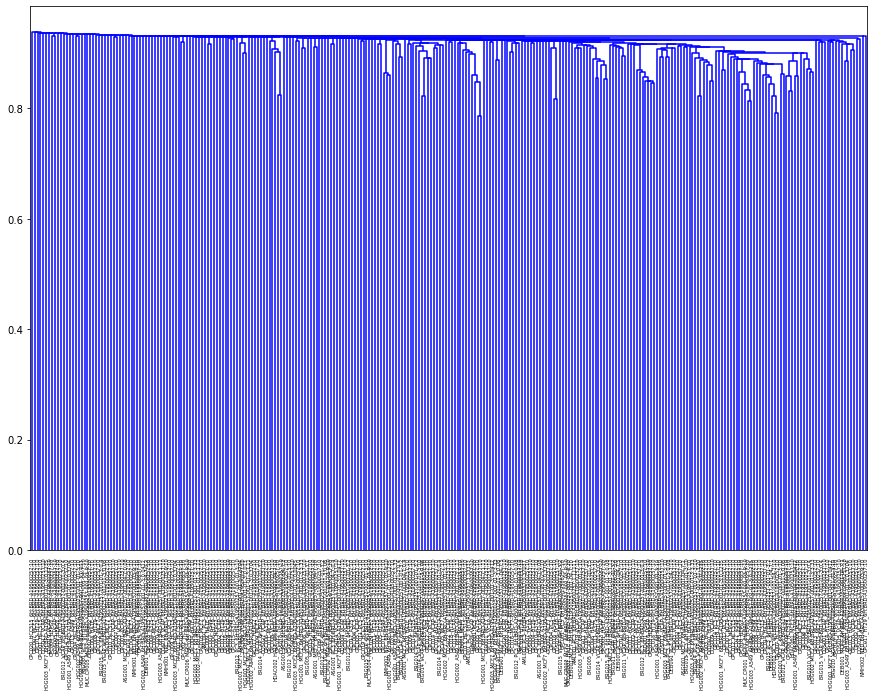

In [29]:
df_pert_id_1_time_1 = view_clustering_results(pert_id_1, time_1, stab_sign, df_CD_signature_metadata, cutoff=0.8)

In [30]:
df_pert_id_1_time_1.head()

,sign_id,pert_id,pert_time,cell_id,cluster
0,CPC020_HA1E_6H:BRD-A19500257:10,BRD-A19500257,6.0,HA1E,283
1,DOS018_VCAP_6H:BRD-A19500257:10,BRD-A19500257,6.0,VCAP,282
2,CPC004_VCAP_6H:BRD-A19500257:10,BRD-A19500257,6.0,VCAP,281
3,CPC016_A549_6H:BRD-A19500257:10,BRD-A19500257,6.0,A549,280
4,CPC002_PC3_6H:BRD-A19500257:10,BRD-A19500257,6.0,PC3,279


Третья группа по времени

Анализируем группу с pertubagen : BRD-A19500257, time: 48.0
количество кластеров : 3
количесво сигнатур в группе :3
Series([], Name: cluster, dtype: int64)


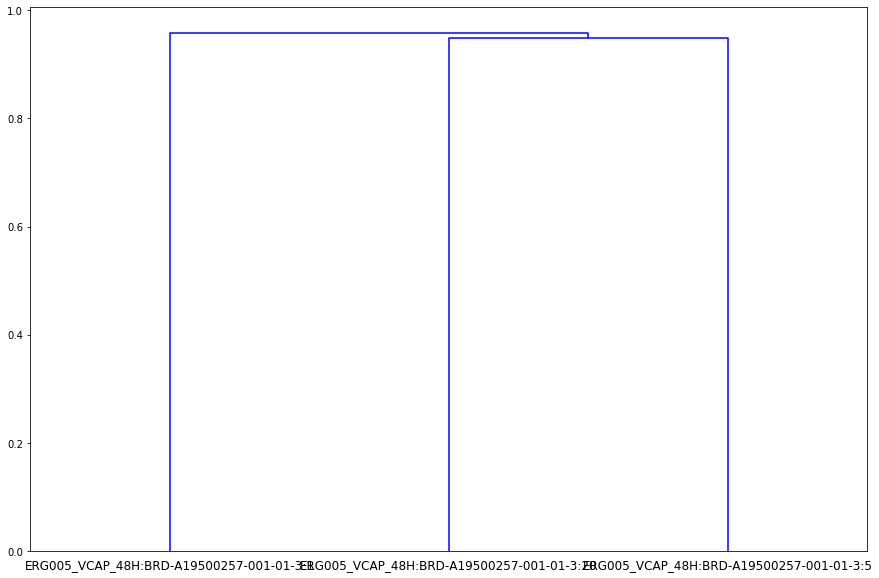

In [31]:
df_pert_id_1_time_2 = view_clustering_results(pert_id_1, time_2, stab_sign, df_CD_signature_metadata, cutoff=0.8)

In [32]:
df_pert_id_1_time_2.head()

,sign_id,pert_id,pert_time,cell_id,cluster
0,ERG005_VCAP_48H:BRD-A19500257-001-01-3:20,BRD-A19500257,48.0,VCAP,3
1,ERG005_VCAP_48H:BRD-A19500257-001-01-3:5,BRD-A19500257,48.0,VCAP,2
2,ERG005_VCAP_48H:BRD-A19500257-001-01-3:1,BRD-A19500257,48.0,VCAP,1
